# Aula 2 - Treinamento Machine Learning - FIAP + Alura

## Artificial Intelligence Tools & Examples - Coleta de dados, pré processamento, análise exploratória de dados (EDA), variáveis preditoras e resposta.

## Prof. Dr. Ahirton Lopes

In [86]:
#Importando as bibliotecas necessárias para manipulação dos dados, e plot da arvore de decisão.

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [87]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [88]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving TelcoChurn.csv to TelcoChurn (3).csv
User uploaded file "TelcoChurn (3).csv" with length 977501 bytes


In [89]:
#Lendo o conjunto de dados através de um dataframe do pandas.
telco_churn = pd.read_csv('TelcoChurn.csv')
telco_churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [90]:
#Verificando o dataframe, e os tipos de dados, bem como se existem valores nulos na base.
telco_churn.info()
telco_churn.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [91]:
#Analisando medidas das tabelas (dando atenção especial ao campo MonthlyCharges)
telco_churn['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

Descrição dos campos:

gender: Indica se o cliente é do sexo masculino ou feminino (valores: Male/Female)

SeniorCitizen: Indica se o cliente é idoso ou não (1,0)

Partner: Indica se o cliente tem um parceiro ou não (Yes,No)

Dependentes: Indica se o cliente possui dependentes ou não (Yes,No)

tenure: Número de meses que o cliente está com a companhia

PhoneService: Indica se o cliente contratou serviço de telefone ou não (Yes,No)

MultipleLines: Indica se o cliente possui linhas múltiplas (Yes, No, No Phone Service)

InternetService: Indica se o cliente contratou serviço de internet, e o tipo propriamente dito (DSL, Fiber optic, No)

OnlineSecurity: Indica se o cliente contratou segurança online (Yes, No, No internet service)

OnlineBackup: Indica se o cliente contratou backup online (Yes, No, No internet service)

DeviceProtection: Indica se o cliente contratou proteção de dispositivo (Yes, No, No internet service)

TechSupport: Indica se o cliente contratou suporte técnico à internet (Yes, No, No internet service)

StreamingTV: Indica se o cliente contratou serviço de streaming de TV (Yes, No, No internet service)

Streaming Movies: Indica se o cliente contratou serviço de streaming de filmes (Yes, No, No internet service)

Contract: Indica o tipo de contrato do cliente (Month-to-month, One year, Two year)

PaperlessBilling: Indica se o cliente possui fatura sem papel (Yes, No)

PaymentMethod: Indica o método de pagamento que o cliente utiliza (Eletronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

MonthlyCharges: Valor cobrado mensalmente para o cliente

TotalCharges: Valor cumulativo já cobrado ao cliente

Churn: Se o cliente cancelou (Yes,No)


In [92]:
#Criando funções de tratamento, para transformar os valores dos campos, em variáveis numéricas.
def gender(value):
    gender = value[0]
    if gender == 'Female':
      return 0
    else:
      return 1

def Yes_No(value):
    Yes_No = value[0]
    if Yes_No == 'Yes':
      return 1
    else:
      return 0

def Internet_Service(value):
    Internet_Service = value[0]
    if Internet_Service == 'DSL':
      return 1
    elif Internet_Service == 'Fiber optic':
      return 2
    else:
      return 0

def MultipleLines(value):
    MultipleLines = value[0]
    if MultipleLines == 'Yes':
      return 1
    elif MultipleLines == 'No':
      return 2
    else:
      return 0

def Internet_Services_YesNo(value):
    Internet_Services_YesNo = value[0]
    if Internet_Services_YesNo == 'Yes':
      return 1
    elif Internet_Services_YesNo == 'No':
      return 2
    else:
      return 0

def Contract(value):
    Contract = value[0]
    if Contract == 'Month-to-month':
      return 1
    elif Contract == 'One year':
      return 2
    else:
      return 0

def PaymentMethod(value):
    PaymentMethod = value[0]
    if PaymentMethod == 'Electronic check':
      return 1
    elif PaymentMethod == 'Mailed check':
      return 2
    elif PaymentMethod == 'Credit card (automatic)':
      return 3
    else:
      return 0

# Algumas variáveis possuem muitos valores, por tanto foi feita uma padronização destes valores, para melhorar a precisão do algoritmo.
def MonthlyCharges(value):
    MonthlyCharges = value[0]
    if MonthlyCharges <= 70:
      return 1
    else:
      return 0

def tenure(value):
    tenure = value[0]
    return round(tenure / 12,0)

In [93]:
#Aplicando a função de transformação dos valores em variáveis numéricas, para aplicar o algoritmo de arvore de decisão.

# Exemplo de funções para transformação
def Yes_No(value):
    return 1 if value == 'Yes' else 0

def Internet_Service(value):
    if value == 'Fiber optic':
        return 2
    elif value == 'DSL':
        return 1
    else:
        return 0

# Aplicando as transformações
telco_churn['gender'] = telco_churn['gender'].map({'Male': 1, 'Female': 0}).astype(int)
telco_churn['SeniorCitizen'] = telco_churn['SeniorCitizen'].astype(int)
telco_churn['Partner'] = telco_churn['Partner'].map(Yes_No).astype(int)
telco_churn['Dependents'] = telco_churn['Dependents'].map(Yes_No).astype(int)
telco_churn['PhoneService'] = telco_churn['PhoneService'].map(Yes_No).astype(int)
telco_churn['MultipleLines'] = telco_churn['MultipleLines'].map({'No phone service': 0, 'Yes': 1, 'No': 0}).astype(int)
telco_churn['InternetService'] = telco_churn['InternetService'].map(Internet_Service).astype(int)
telco_churn['Churn'] = telco_churn['Churn'].map(Yes_No).astype(int)

# Verificando as informações do DataFrame
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   int64  
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   int64  
 4   Dependents        7043 non-null   int64  
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   int64  
 7   MultipleLines     7043 non-null   int64  
 8   InternetService   7043 non-null   int64  
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [94]:
#Validando aplicação das funções
telco_churn['PaymentMethod'].unique()
#telco_churn['tenure'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [95]:
# Seleciona apenas as colunas numéricas
numerical_columns = telco_churn.select_dtypes(include=['float64', 'int64'])

In [96]:
# Calcula a correlação entre as colunas numéricas
correlation_matrix = numerical_columns.corr()

<Axes: >

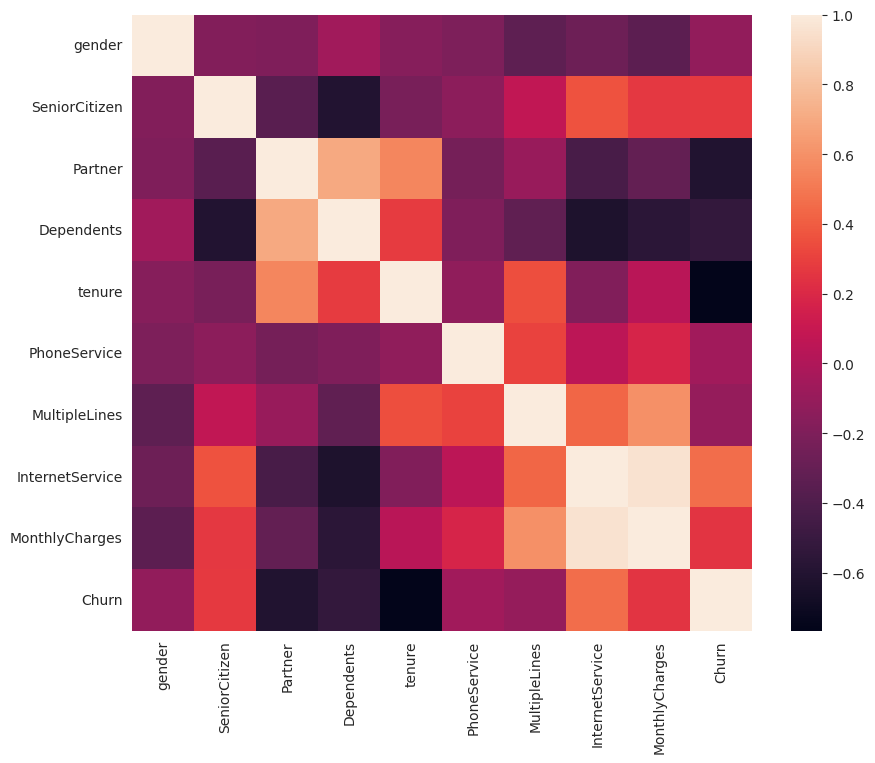

In [97]:
#Analisando correlação das variáveis
sb.heatmap(correlation_matrix.corr())

In [98]:
#Selecionando somente as variáveis desejadas para aplicação do algorítimo.
telco_churn_2 = telco_churn[['Partner','tenure','PhoneService','InternetService','MonthlyCharges','Churn']]
telco_churn_2.head()

Partner  tenure  PhoneService  InternetService  MonthlyCharges  Churn
0        1       1             0                1           29.85      0
1        0      34             1                1           56.95      0
2        0       2             1                1           53.85      1
3        0      45             0                1           42.30      0
4        0       2             1                2           70.70      1

In [99]:
#Selecionando as variáveis preditoras ou covariáveis
X = telco_churn_2.drop('Churn',axis=1)
X.head()

Partner  tenure  PhoneService  InternetService  MonthlyCharges
0        1       1             0                1           29.85
1        0      34             1                1           56.95
2        0       2             1                1           53.85
3        0      45             0                1           42.30
4        0       2             1                2           70.70

In [100]:
#Selecionando a variável resposta da árvore de decisão
y = telco_churn_2['Churn']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [101]:
#Dividindo em duas amostras: a primeira para treino e a segunda para validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
dtree = DecisionTreeClassifier()

In [103]:
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(predictions)

[1 0 0 ... 0 0 1]


In [104]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1036
           1       0.46      0.47      0.46       373

    accuracy                           0.72      1409
   macro avg       0.64      0.64      0.64      1409
weighted avg       0.72      0.72      0.72      1409



Algoritmo de arvore de decisão, com 80% de precisão!

In [105]:
#Plotando o gráfico do algorítmo de arvore de decisão
!pip install pydot

In [106]:
!pip install graphviz
!pip install six

In [107]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot as pydot

In [108]:
# Variáveis preditoras ou covariáveis
features = list(telco_churn_2.columns[1:])
features

['tenure', 'PhoneService', 'InternetService', 'MonthlyCharges', 'Churn']

In [109]:
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no churn'
y_train_str[y_train_str == '1'] = 'churn'
y_train_str = y_train_str.values
y_train_str

array(['no churn', 'no churn', 'churn', ..., 'no churn', 'churn',
       'no churn'], dtype=object)

In [110]:
dot_data = StringIO()
export_graphviz(dtree,out_file=dot_data,
                feature_names=features,
                class_names=y_train_str,
                filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())